In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Load Dataset

In [3]:
df = pd.read_csv('tc20171021.csv', error_bad_lines=False, warn_bad_lines=False)
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (1216250, 9)


,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


#### Print Some Basic Info

In [4]:
df.info()
print('\nConclusion: There is no null value in the data')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216250 entries, 0 to 1216249
Data columns (total 9 columns):
Id         1216250 non-null int64
Price      1216250 non-null int64
Year       1216250 non-null int64
Mileage    1216250 non-null int64
City       1216250 non-null object
State      1216250 non-null object
Vin        1216250 non-null object
Make       1216250 non-null object
Model      1216250 non-null object
dtypes: int64(4), object(5)
memory usage: 83.5+ MB

Conclusion: There is no null value in the data


,Id,Price,Year,Mileage
count,1216250.000,1216250.000,1216250.000,1216250.000
mean,613281.414,20968.871,2013.307,52908.102
std,354657.101,13159.402,3.442,81927.749
min,1.000,1500.000,1997.000,5.000
25%,308112.250,12994.000,2012.000,23962.000
50%,613491.500,17995.000,2014.000,40534.000
75%,917553.750,26414.000,2016.000,72725.000
max,1233042.000,499500.000,2018.000,77587763.000


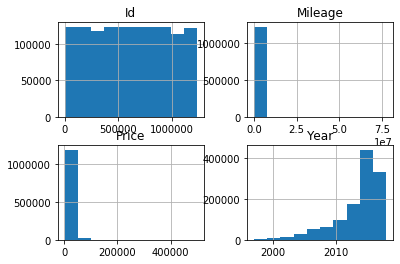

Conclusion: Mileage and Price is highly right skewed


In [6]:
display(df.describe())
df.hist()
plt.show()

print(f'Conclusion: Mileage and Price is highly right skewed')

#### Correlation Analysis

In [7]:
corr = df.corr()
display(corr.style.background_gradient(cmap='coolwarm'))
print(f'Insight: Year is positively correlated price and mileage is negatively correlated with price')

,Id,Price,Year,Mileage
Id,1,-0.0138392,0.0349883,-0.012833
Price,-0.0138392,1,0.405673,-0.212439
Year,0.0349883,0.405673,1,-0.3924
Mileage,-0.012833,-0.212439,-0.3924,1


Insight: Year is positively correlated price and mileage is negatively correlated with price


#### Boxplot Analysis

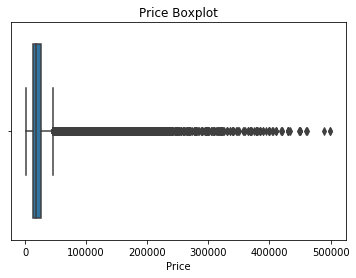

Boxplot for price attribute


In [15]:
sns.boxplot(x=df['Price']).set_title("Price Boxplot")
plt.show()
print('Boxplot for price attribute')

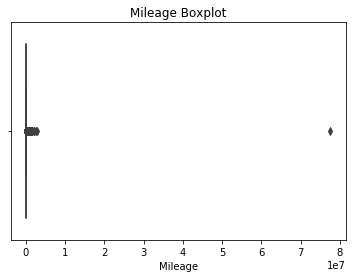

Boxplot for Mileage attribute


In [51]:
sns.boxplot(x=df['Mileage']).set_title("Mileage Boxplot")
plt.show()
print('Boxplot for Mileage attribute')

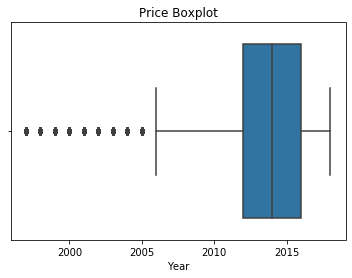

Boxplot for Mileage attribute


In [17]:
sns.boxplot(x=df['Year']).set_title("Price Boxplot")
plt.show()
print('Boxplot for Mileage attribute')

#### Preprocessing

In [23]:
df_modified = df.copy()

##### Change all text to lower case

In [24]:
str_columns = df_modified.select_dtypes(include=['object']).columns
for col in str_columns:
    df_modified[col] = df_modified[col].str.lower()

df_modified.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,jefferson city,mo,kl4cjbsbxfb267643,buick,encoreconvenience
1,2,15749,2015,27592,highland,in,kl4cjasb5fb245057,buick,encorefwd
2,3,16998,2015,13650,boone,nc,kl4cjcsb0fb264921,buick,encoreleather
3,4,15777,2015,25195,new orleans,la,kl4cjasb4fb217542,buick,encorefwd
4,5,16784,2015,22800,las vegas,nv,kl4cjbsb3fb166881,buick,encoreconvenience


##### Removing Outliers

Removing top and bottom 2.5% of Mileage and Price data

In [25]:
rows = df.shape[0]
rows_10_percent = int(rows * 0.025)


df_modified = df_modified.sort_values(by=['Mileage'], ascending=False)[rows_10_percent:]
df_modified = df_modified[:-rows_10_percent]
df_modified = df_modified.sort_values(by=['Price'], ascending=False)
df_modified = df_modified[rows_10_percent:]
df_modified = df_modified[:-rows_10_percent]

display(df_modified.shape)
df_modified.head()

(1094626, 9)

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
9566,9567,48945,2015,96680,gainesville,fl,1gt424e88ff524844,gmc,sierra
150512,150513,48945,2017,17515,madison,wi,5uxwx7c5xh0u39786,bmw,x3xdrive35i
20945,20946,48944,2015,53268,spring,tx,1ft7w2bt2fec22471,ford,super
192737,192738,48944,2016,9141,houston,tx,wauc4afh8gn009298,audi,s5cabriolet
702691,708058,48944,2016,31315,stafford,tx,1ftew1ef8gfa36906,ford,f-1504wd


##### Dropping Unnecessary Column

In [31]:
cols = ['Id', 'Price', 'Year', 'Mileage', 'Make']
df_modified = df_modified[cols]
df_modified.head()

,Id,Price,Year,Mileage,Make
9566,9567,48945,2015,96680,gmc
150512,150513,48945,2017,17515,bmw
20945,20946,48944,2015,53268,ford
192737,192738,48944,2016,9141,audi
702691,708058,48944,2016,31315,ford


##### Encode Categorical Data

In [34]:
lb_make = LabelEncoder()
df_modified['Make_Encoded'] = lb_make.fit_transform(df_modified['Make'])
df_modified.head()

,Id,Price,Year,Mileage,Make,Make_Encoded
9566,9567,48945,2015,96680,gmc,18
150512,150513,48945,2017,17515,bmw,6
20945,20946,48944,2015,53268,ford,14
192737,192738,48944,2016,9141,audi,4
702691,708058,48944,2016,31315,ford,14


#### Comparison

##### Data Shape

In [36]:
print(f'DataFrame shape before data preparation: {df.shape}')
print(f'DataFrame shape after data preparation: {df_modified.shape}')

DataFrame shape before data preparation: (1216250, 9)
DataFrame shape after data preparation: (1094626, 6)


##### Histogram

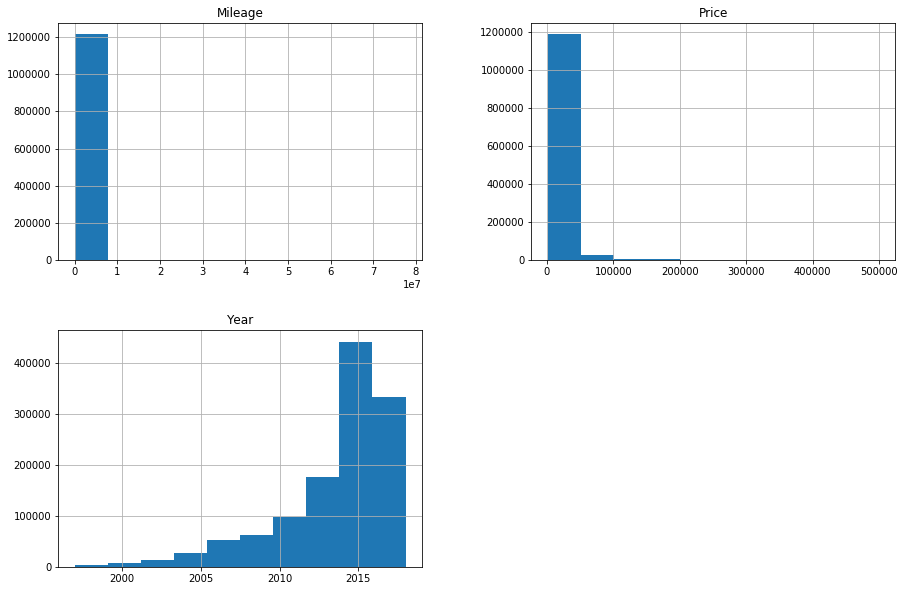

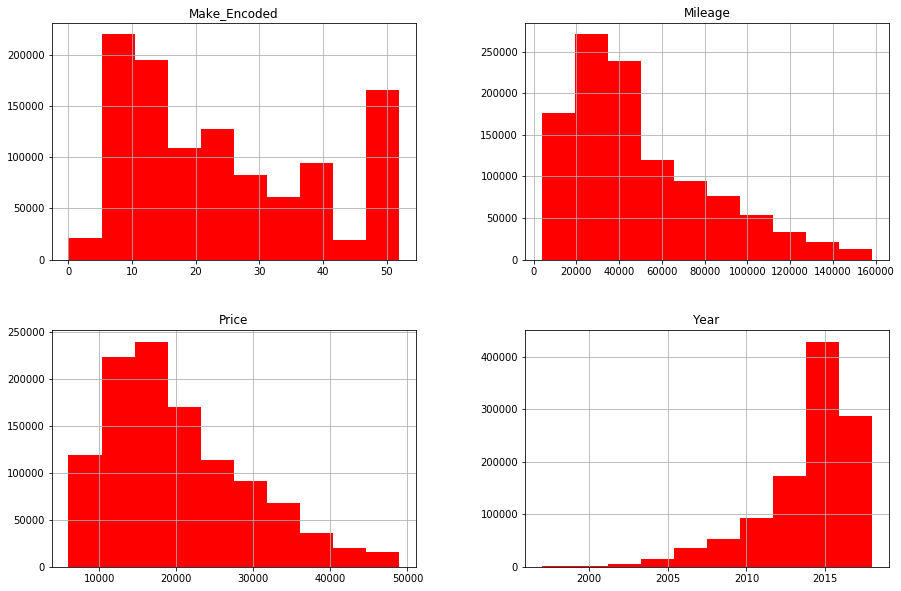

In [50]:
df[['Price', 'Mileage', 'Year']].hist(figsize=(15, 10))
plt.show()
df_modified[['Price', 'Mileage', 'Year', 'Make_Encoded']].hist(figsize=(15, 10), color='red')
plt.show()

##### Boxplot for each attribute

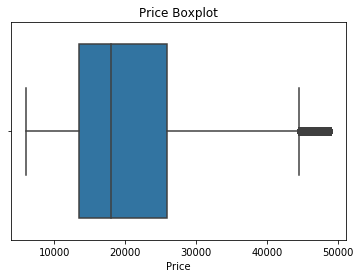

Boxplot for Price attribute


In [43]:
sns.boxplot(x=df_modified['Price']).set_title("Price Boxplot")
plt.show()
print('Boxplot for Price attribute')

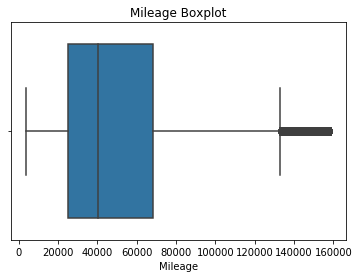

Boxplot for Mileage attribute


In [52]:
sns.boxplot(x=df_modified['Mileage']).set_title("Mileage Boxplot")
plt.show()
print('Boxplot for Mileage attribute')

##### Correlation

In [54]:
corr = df[['Price', 'Mileage', 'Year']].corr()
print('Correlation from original data')
display(corr.style.background_gradient(cmap='coolwarm'))
print('Correlation from modified data')
corr = df_modified[['Price', 'Mileage', 'Year', 'Make_Encoded']].corr()
display(corr.style.background_gradient(cmap='coolwarm'))

Correlation from original data


,Price,Mileage,Year
Price,1,-0.212439,0.405673
Mileage,-0.212439,1,-0.3924
Year,0.405673,-0.3924,1


Correlation from modified data


,Price,Mileage,Year,Make_Encoded
Price,1,-0.432317,0.40963,-0.0935743
Mileage,-0.432317,1,-0.736671,-0.040907
Year,0.40963,-0.736671,1,0.0250398
Make_Encoded,-0.0935743,-0.040907,0.0250398,1
